# SPARK INTERN FEB 2021

Author Name : ABIRAMI B

# Prediction using Decision Tree Algorithm

**The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.**

**Objective:**
    Create the Decision Tree classifier and visualize it graphically.

In [5]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [49]:
# Loading Dataset:
data = pd.read_csv('Iris.csv')
data.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [7]:
# Before building supervised classification model (Decision Tree Algorithm) on the given dataset, 
# some of Data Preprocessing steps to be done:
# 1. Null Value Imputation
# 2. Encoding categorical feature to build machine learning model
# 3. To build classification model, Outlier treatment is not mandatory.

In [50]:
# Checking for null value imputation:
data.isnull().sum()
# No null vlaues in the given dataset.

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [42]:
# Checking the datatype of all individual features in the given dataset to build machine learning model:
data.dtypes

# In the given dataset, Species is the only feature which is object in nature of datatype.
# To build a machine learning model, all the features in the datatype are numerical in nature.

# Data preprocessing "Encoding" is used.

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [51]:
# To check the value counts of "Species":
data['Species'].value_counts()

# Encode or classify the target column "Species".

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [52]:
# There are three different Species in the target column. Classifying the target column as 0,1,2.

data['Species'] = data['Species'].replace({'Iris-setosa':0, 'Iris-virginica':1, 'Iris-versicolor':2})

In [53]:
# Before building classification model, id in the given dataset are unique in nature. 
# so we can set it as index for the given dataset.

data = data.set_index('Id')
data.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0


In [56]:
# Building Classification model of Decision Tree:
from sklearn.model_selection import train_test_split

# Hence the target is discrete in nature so building DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Spliting input and output data from the given dataset:
inp = data.drop('Species',axis = 1)
out = data['Species']

# Spliting the data as train,test input and output:
xtrain,xtest,ytrain,ytest = train_test_split(inp,out,test_size = 0.3,random_state = 0)

# Building the decision tree model:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

ypred = dt.predict(xtest)

# Finding the Confusion matrix based on ytest and ypred:
cm = confusion_matrix(ytest,ypred)
cm

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 17]], dtype=int64)

In [59]:
# For example: if we consider class - 0 ('Iris-setosa') and finding values from confusion matrix.
tp_0 = cm[0,0]
tn_0 = cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]
fp_0 = cm[0,1]+cm[0,2]
fn_0 = cm[1,0]+cm[2,0]

precision = tp_0 / (tp_0 + fp_0)
recall = tp_0 / (tp_0 + fn_0)
f1 = 2*precision*recall / (precision + recall)

print(precision,recall,f1)

# similarly we can find the theroitical presicion,recall and f1 score value for other two classes.

1.0 1.0 1.0


In [67]:
# we can find the model quality and performance for mutliclass through micro,macro and weighted method:

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

print('***************** Calculating Model Accuracy************************************************')
print('Accuracy of the model is:',accuracy_score(ytest,ypred))


print('*****************Calcaluting Precision,Recall,F1_score through micro avg method**************')
print('Micro Precision of the model is:',precision_score(ytest,ypred,average = 'micro'))
print('Micro recall of the model is:',recall_score(ytest,ypred,average = 'micro'))
print('Micro f1_score of the model is:',f1_score(ytest,ypred,average = 'micro'))

print('*****************Calcaluting Precision,Recall,F1_score through macro avg method**************')
print('Macro Precision of the model is:',precision_score(ytest,ypred,average = 'macro'))
print('Macro recall of the model is:',recall_score(ytest,ypred,average = 'macro'))
print('Macro f1_score of the model is:',f1_score(ytest,ypred,average = 'macro'))



print('*****************Calcaluting Precision,Recall,F1_score through Weighted avg method**************')
print('Weighted Precision of the model is:',precision_score(ytest,ypred,average = 'weighted'))
print('Weighted recall of the model is:',recall_score(ytest,ypred,average = 'weighted'))
print('Weighted f1_score of the model is:',f1_score(ytest,ypred,average = 'weighted'))

print('****************************Classification report***********************************************')
print(classification_report(ytest,ypred))

***************** Calculating Model Accuracy************************************************
Accuracy of the model is: 0.9777777777777777
*****************Calcaluting Precision,Recall,F1_score through micro avg method**************
Micro Precision of the model is: 0.9777777777777777
Micro recall of the model is: 0.9777777777777777
Micro f1_score of the model is: 0.9777777777777777
*****************Calcaluting Precision,Recall,F1_score through macro avg method**************
Macro Precision of the model is: 0.9722222222222222
Macro recall of the model is: 0.9814814814814815
Macro f1_score of the model is: 0.975983436853002
*****************Calcaluting Precision,Recall,F1_score through Weighted avg method**************
Weighted Precision of the model is: 0.9796296296296295
Weighted recall of the model is: 0.9777777777777777
Weighted f1_score of the model is: 0.9779434092477569
****************************Classification report***********************************************
              pr

In [ ]:
# From the above individual finding of precision,recall and f1 score of all the three classes and classification report,
# we can conclude the model performance of the given dataset is approximately 98%.

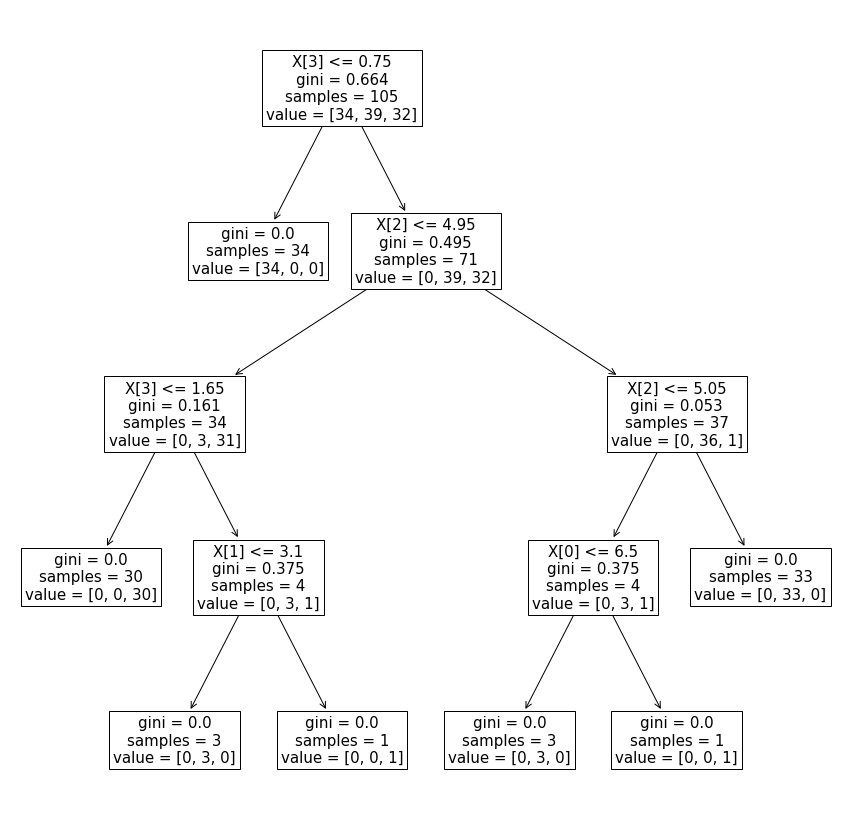

In [73]:
# Visualize the graph:
from sklearn import tree

plt.figure(figsize = (15,15))
tree.plot_tree(dt,fontsize = 15)
plt.show()

In [76]:
# To calculate bias error and variance error:
from sklearn.model_selection import cross_val_score

score = cross_val_score(dt,inp,out,cv = 5,scoring = 'accuracy')

be = 1 - np.mean(score)
cve = np.std(score) / np.mean(score)

print('Bias error of the model is:',be)
print('Coeff of varaince error is:',cve)

Bias error of the model is: 0.039999999999999813
Coeff of varaince error is: 0.03402069087198857


In [75]:
# to find the best parameteres:
from sklearn.model_selection import GridSearchCV

param = {'max_depth':[3,4,5,6,7,8,9,10,11],
        'criterion':['gini','entropy']} 

dt = DecisionTreeClassifier()

hyp = GridSearchCV(estimator = dt, param_grid = param, cv = 5, scoring = 'accuracy')
hyp_mod = hyp.fit(xtrain,ytrain)

hyp_mod.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [ ]:
# Building the model with 'criterion': 'gini', 'max_depth': 4 maximum model performance can be achevied.

In [77]:
# Building final model:
final_dt = DecisionTreeClassifier(**hyp_mod.best_params_)
final_dt.fit(xtrain,ytrain)

final_dt.feature_importances_

array([0.        , 0.02150464, 0.39766951, 0.58082584])

In [78]:
# Business Interpretation:
f_mod = pd.DataFrame()

f_mod['Feature'] = xtrain.columns
f_mod['Feat_importance'] = final_dt.feature_importances_

f_mod.sort_values('Feat_importance',ascending = False)

,Feature,Feat_importance
3,PetalWidthCm,0.580826
2,PetalLengthCm,0.397670
1,SepalWidthCm,0.021505
0,SepalLengthCm,0.000000


In [ ]:
# From the above Feature importance we can conclude that, "PetalWidthCm" has high effect on reducing the gini impurity value.
# i.e "PetalWidthCm" plays a major role on finding the target.

# now we can give any test data to predict the right class.